In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
%%writefile webnode.py 


from dotenv import load_dotenv
load_dotenv()

from langchain_tavily import TavilySearch

from states import State

def web_search_fun(query: str) -> str:
    search = TavilySearch(max_results = 5)
    try:
        response = search.invoke(query)
        formatted_results = []
        for result in response["results"]:
            formatted_results.append(f"Title:{result.get('title','N/A')}\nURL:{result.get('url','N/A')}\nContent: {result.get('content', 'N/A')}\n")
        
        search_summary = "\n".join(formatted_results)
        #return search_summary
    except Exception as e:
        search_summary = f"Search failed: {str(e)}"
    return search_summary


def web_search_node(state: State):
    return {"search_results": web_search_fun(state["question"]) }

Overwriting webnode.py


In [6]:
out=web_search_fun("Sneh Lata Shiv Nadar University")
print(out)

Title:Sneh Lata | Shiv Nadar University | 15 Publications | 66 Citations
URL:https://scispace.com/authors/sneh-lata-146r0gzpgh
Content: Sneh Lata is an academic researcher from Shiv Nadar University. The author has contributed to research in topics: Hilbert space & Hardy space.

Title:Faculty - Shiv Nadar University
URL:https://snu.edu.in/faculty/
Content: Sneh Lata. Associate Professor School of Natural Sciences. Department of Mathematics. Snehasis Mukherjee. Associate Professor

Title:Sneh LATA | Faculty Member | PhD | Shiv Nadar University, Dādri
URL:https://www.researchgate.net/profile/Sneh-Lata-3
Content: Sneh LATA, Faculty Member | Cited by 37 | of Shiv Nadar University, Dādri | Read 4 publications | Contact Sneh LATA.

Title:NYJM Abstract - Sneh Lata, Sushant Pokhriyal, and Dinesh Singh
URL:https://nyjm.albany.edu/j/2023/29-10.html
Content: Shiv Nadar University School of Natural Sciences Gautam Budh Nagar - 203207, Uttar Pradesh, India sneh.lata@snu.edu.in. Sushant Pokhriyal

T

In [7]:
# A simple test graph
from langgraph.graph import StateGraph, START, END

from states import State
from webnode import web_search_node

graph_builder = StateGraph(State)

graph_builder.add_node("web_search", web_search_node)

graph_builder.add_edge(START, "web_search")
graph_builder.add_edge("web_search", END)
graph = graph_builder.compile() 

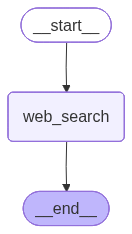

In [19]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [8]:
state = State(question="Ajit Kumar Shiv Nadar University")

state = graph.invoke(state)

state

{'question': 'Ajit Kumar Shiv Nadar University',
 'search_results': 'Title:Ajit Kumar - Shiv Nadar University\nURL:https://snu.edu.in/faculty/ajit-kumar/\nContent: Image 1: Shiv Nadar University Logo Image 2 Image 3 *   Admissions *   Programs *   Schools and Centers *   Department of Civil Engineering *   Department of Mechanical Engineering *   Department of Computer Science and Engineering *   Department of Chemical Engineering *   Department of Electrical Engineering *   Department of Chemistry *   Department of Life Sciences *   Department of Mathematics *   Department of Physics *   Department of Design *   Department of Economics *   Department of English *   Department of International Relations and Governance Studies *   Department of Sociology *   Department of Rural Management Image 6: Ajit Kumar Your Admission Assistant. *   Programs *   Admissions *   Schools and Centers *   Student Handbook *   Admission Blogs *   Parent Handbook *   For UG Admissions 1800-102-1768\n\nTit